## Web Analytics DATA 620 - Week 03 - Part 02
## Assignment: “Assignment Data Sets”
## Group - Chris Bloome / Mustafa Telab / Vinayak Kamath
## Date - 20th June 2021

This week's assignment is to:

Upload the Davis Southern Club Women data set, and answer the following questions: "What can you infer about the relationships between (1) the women, and (2) the social events?"  

In [1]:
%matplotlib inline


# Data Description, Upload


Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

C:\Users\bloom\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\bloom\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\bloom\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\bloom\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Ax

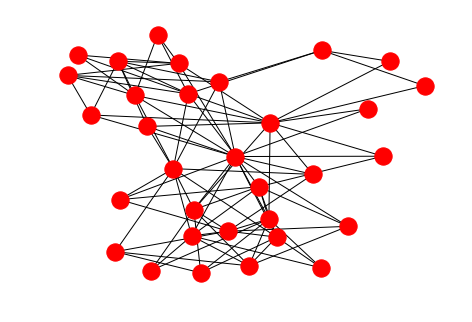

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

nx.draw(G)
plt.show()

## (1) What can you infer about the relationships between the women?

The plot above is a little hard to read. Let's start by recreating the plot with a circular layout and with labels. <br>
<br>
We will then view a network graph containing only the relationships between the women themselves. 



C:\Users\bloom\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


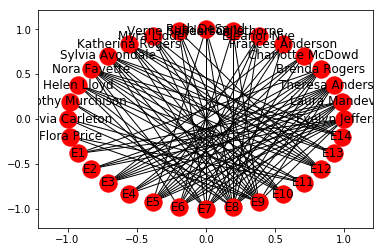

In [3]:
nx.draw_networkx(G,with_labels=True,pos=nx.circular_layout(G))



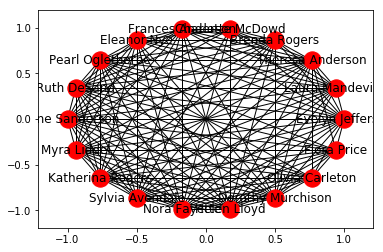

In [4]:
nx.draw_networkx(W,with_labels=True,pos=nx.shell_layout(W))



It certainly seems as though each of the women are connected to each other by way of at least one social function. Lets see if this can be confirmed with the degree function. 

In [5]:
nx.degree(W)

{'Evelyn Jefferson': 17,
 'Laura Mandeville': 15,
 'Theresa Anderson': 17,
 'Brenda Rogers': 15,
 'Charlotte McDowd': 11,
 'Frances Anderson': 15,
 'Eleanor Nye': 15,
 'Pearl Oglethorpe': 16,
 'Ruth DeSand': 17,
 'Verne Sanderson': 17,
 'Myra Liddel': 16,
 'Katherina Rogers': 16,
 'Sylvia Avondale': 17,
 'Nora Fayette': 17,
 'Helen Lloyd': 17,
 'Dorothy Murchison': 16,
 'Olivia Carleton': 12,
 'Flora Price': 12}

The majority of the women in this club all share at least one meeting with each member of the club. There are a few exceptions, however, all but 3 share with greater than 13 of the 17 women. To put this another way, we can safely say that MOST of the women in this social club know NEARLY every other member, by virtue of at least one shared meeting. 

We can also view the degree centrality for good measure:

In [6]:
nx.degree_centrality(W)

{'Evelyn Jefferson': 1.0,
 'Laura Mandeville': 0.8823529411764706,
 'Theresa Anderson': 1.0,
 'Brenda Rogers': 0.8823529411764706,
 'Charlotte McDowd': 0.6470588235294118,
 'Frances Anderson': 0.8823529411764706,
 'Eleanor Nye': 0.8823529411764706,
 'Pearl Oglethorpe': 0.9411764705882353,
 'Ruth DeSand': 1.0,
 'Verne Sanderson': 1.0,
 'Myra Liddel': 0.9411764705882353,
 'Katherina Rogers': 0.9411764705882353,
 'Sylvia Avondale': 1.0,
 'Nora Fayette': 1.0,
 'Helen Lloyd': 1.0,
 'Dorothy Murchison': 0.9411764705882353,
 'Olivia Carleton': 0.7058823529411764,
 'Flora Price': 0.7058823529411764}

## (2) What can you infer about the relationships between the club events?

We can do a similar exercise for the club functions:


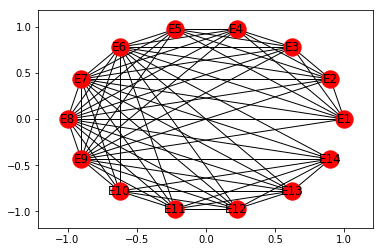

In [7]:
C = bipartite.projected_graph(G, clubs)
nx.draw_networkx(C,with_labels=True, pos=nx.circular_layout(C))

Initially, it is clear that the social functions are not as connected as the women. Looking at the above graph and the comparable  one of our women data set, we would expect to find that each function was attended by roughly half the women, but due to the quantity of functions and their makeup, each member of the club would be familiar with nearly all other members. Lets verify this by reviewing the degree of the entire data set:

In [8]:
nx.degree(G)

{'Evelyn Jefferson': 8,
 'Laura Mandeville': 7,
 'Theresa Anderson': 8,
 'Brenda Rogers': 7,
 'Charlotte McDowd': 4,
 'Frances Anderson': 4,
 'Eleanor Nye': 4,
 'Pearl Oglethorpe': 3,
 'Ruth DeSand': 4,
 'Verne Sanderson': 4,
 'Myra Liddel': 4,
 'Katherina Rogers': 6,
 'Sylvia Avondale': 7,
 'Nora Fayette': 8,
 'Helen Lloyd': 5,
 'Dorothy Murchison': 2,
 'Olivia Carleton': 2,
 'Flora Price': 2,
 'E1': 3,
 'E2': 3,
 'E3': 6,
 'E4': 4,
 'E5': 8,
 'E6': 8,
 'E7': 10,
 'E8': 14,
 'E9': 12,
 'E10': 5,
 'E11': 4,
 'E12': 6,
 'E13': 3,
 'E14': 3}

To put a finer point on our analysis, it might be helpful to answer a specific question: "If we had important information for the entire club, which meeting makes the most sense to share this information." 

Looking above, we would likely want to announce this at E8, as it has the highest number of participants. That being said, by viewing the degree and the degree centrality, we find that by announcing at E6,7,8, or 9, we would be able to reach the members of ALL of our meetings by one degree of separation. Provided we trust our club members to disseminate information, any of these would work fine.

In [9]:
nx.degree(C)

{'E1': 8,
 'E2': 8,
 'E3': 8,
 'E4': 8,
 'E5': 8,
 'E6': 13,
 'E7': 13,
 'E8': 13,
 'E9': 13,
 'E10': 8,
 'E11': 8,
 'E12': 8,
 'E13': 8,
 'E14': 8}

In [10]:
nx.degree_centrality(C)

{'E1': 0.6153846153846154,
 'E2': 0.6153846153846154,
 'E3': 0.6153846153846154,
 'E4': 0.6153846153846154,
 'E5': 0.6153846153846154,
 'E6': 1.0,
 'E7': 1.0,
 'E8': 1.0,
 'E9': 1.0,
 'E10': 0.6153846153846154,
 'E11': 0.6153846153846154,
 'E12': 0.6153846153846154,
 'E13': 0.6153846153846154,
 'E14': 0.6153846153846154}